In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.1 MB 5.4 MB/s 
     |████████████████████████████████| 53 kB 2.1 MB/s 
     |████████████████████████████████| 2.0 MB 33.3 MB/s 
     |████████████████████████████████| 84 kB 3.2 MB/s 
     |████████████████████████████████| 54 kB 3.0 MB/s 
     |████████████████████████████████| 140 kB 55.6 MB/s 
     |████████████████████████████████| 256 kB 59.6 MB/s 
     |████████████████████████████████| 212 kB 50.2 MB/s 
     |████████████████████████████████| 1.1 MB 49.8 MB/s 
     |████████████████████████████████| 94 kB 3.2 MB/s 
     |████████████████████████████████| 271 kB 46.9 MB/s 
     |████████████████████████████████| 144 kB 48.4 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 80 kB 8.8 MB/s 
     |████████████████████████████████| 43 kB 1.5 MB/s 
     |████████████████████████████████| 4.0 MB

In [ ]:
import gradio as gr

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

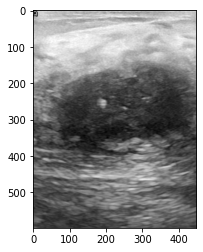

In [ ]:
img = image.load_img(r"/content/drive/MyDrive/dl project/breast_cancer_project_dataset/training/malignent/malignant (1).png")
plt.imshow(img)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

# New Section

In [ ]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [ ]:
train_dataset = train.flow_from_directory(r"/content/drive/MyDrive/dl project/breast_cancer_project_dataset/training",
                                          target_size = (200,200),
                                          batch_size= 3,
                                          class_mode= 'binary',
                                         )
validation_dataset = train.flow_from_directory(r"/content/drive/MyDrive/dl project/breast_cancer_project_dataset/validation",
                                          target_size = (200,200),
                                          batch_size= 3,
                                          class_mode= 'binary',
                                         )

Found 687 images belonging to 2 classes.
Found 249 images belonging to 2 classes.


In [ ]:
train_dataset.class_indices

{'malignent': 0, 'normal': 1}

In [ ]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                             tf.keras.layers.MaxPool2D(2,2),
                             #
                             tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             #
                             tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',input_shape = (200,200,3)),
                             tf.keras.layers.MaxPool2D(2,2),
                             ##
                             tf.keras.layers.Flatten(),
                             #
                             tf.keras.layers.Dense(512,activation = 'relu'),
                             ##
                             tf.keras.layers.Dense(1,activation = 'sigmoid')
                            ])

In [ ]:
model.compile(loss='binary_crossentropy',
  optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
  metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model_fit= model.fit(train_dataset,
           steps_per_epoch = 1,
           epochs = 5,
           validation_data = validation_dataset
         )

Epoch 1/5
1/1 [==============================] - 10s 10s/step - loss: 1.1887 - accuracy: 0.3333 - val_loss: 0.6270 - val_accuracy: 0.6627
Epoch 2/5
1/1 [==============================] - 6s 6s/step - loss: 0.5314 - accuracy: 0.6667 - val_loss: 0.6175 - val_accuracy: 0.6265
Epoch 3/5
1/1 [==============================] - 6s 6s/step - loss: 0.5871 - accuracy: 1.0000 - val_loss: 0.6514 - val_accuracy: 0.6185
Epoch 4/5
1/1 [==============================] - 6s 6s/step - loss: 0.4434 - accuracy: 1.0000 - val_loss: 0.6557 - val_accuracy: 0.6345
Epoch 5/5
1/1 [==============================] - 6s 6s/step - loss: 0.6714 - accuracy: 0.6667 - val_loss: 0.5598 - val_accuracy: 0.7269


In [ ]:
def predict_image(img):
  class_names = ['normal', 'malignent']
  img_4d=img.reshape((1,200,200,3))
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(1)}

In [ ]:
image = gr.inputs.Image(shape=(200,200))
label = gr.outputs.Label(num_top_classes=2)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://46116.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


In [ ]:
img = "/content/drive/MyDrive/dl project/breast_cancer_project_dataset/training/normal/normal (1).png"
pred=model.predict(img)

if pred == 0:
  print("malignent")
else:
  print("normal")

NameError: ignored